### tip] shitf + Tab 눌러서 어떻게 파라미터 구성되는지 확인 가능

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## <step1. API호출> :트위터 API로 데이터 가져오기
- 오류 참고 사이트 : http://hleecaster.com/twitter-api-developer/

- (cunsummer) API key = 'cunn1YoqjZYAmvp2XmMEep60U'
- (cunsummer) API secret key = 'b2PMCebmx4wKOPBTH2pQG3nbWhEn51iDSn9yfptxFJD2UM7Nse'
- Access token = '1282856275198357506-a4N8TpckA3anBBJDezZAynD5whhj86'
- Access token secret = 'QbW7NLFDHTaZGifspSi1bpua5Pjslv7GU7SKGR6szKQtA'

**발급 완려된 키를 {your_key} 대신 입력**

*와 어이없어라. 개괄호때문에 한시간을 해매고 잇었다. 왜 나만 오류 나나했잖아ㅠㅠㅠ*

In [2]:
import tweepy

CONSUMER_KEY = "im8vt4hxXJ3OuNskDuL2ur4eP"
CONSUMER_SECRET = "HUIm6XeK4MY2YUIDfHy8C92FAbfwAmH8Xez6ONVSNBGSMoInIF"
ACCESS_TOKEN_KEY = "1282856275198357506-8qkYQbQ8TFnepcsBOyw7ye8Gtqpszu"
ACCESS_TOKEN_SECRET = "P7auVIWg02f44nkf7jYJllDRyDc4YEv0pPQkAauMHQf34"

# 개인정보 인증을 요청하는 Handler입니다.
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

# 인증 요청을 수행합니다.
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)

# twitter API를 사용하기 위한 준비입니다.
api = tweepy.API(auth, wait_on_rate_limit=True)

**펭수 키워드 검색**

In [3]:
keyword = "펭수"
tweets = api.search(keyword)
for tweet in tweets:
    print(tweet.text)
    print(tweet.entities['user_mentions'])
    print(tweet.entities['hashtags'])
    print(tweet.created_at)

RT @bangban19928062: 아 내 사랑들 #펭수 #대취타 #AgustD #suga @BTS_twt https://t.co/m0yEJBZrxv
[{'screen_name': 'bangban19928062', 'name': 'bangbang', 'id': 1275045816432902144, 'id_str': '1275045816432902144', 'indices': [3, 19]}, {'screen_name': 'BTS_twt', 'name': '방탄소년단', 'id': 335141638, 'id_str': '335141638', 'indices': [52, 60]}]
[{'text': '펭수', 'indices': [29, 32]}, {'text': '대취타', 'indices': [33, 37]}, {'text': 'AgustD', 'indices': [38, 45]}, {'text': 'suga', 'indices': [46, 51]}]
2020-07-14 06:09:09
RT @bangban19928062: 아 내 사랑들 #펭수 #대취타 #AgustD #suga @BTS_twt https://t.co/m0yEJBZrxv
[{'screen_name': 'bangban19928062', 'name': 'bangbang', 'id': 1275045816432902144, 'id_str': '1275045816432902144', 'indices': [3, 19]}, {'screen_name': 'BTS_twt', 'name': '방탄소년단', 'id': 335141638, 'id_str': '335141638', 'indices': [52, 60]}]
[{'text': '펭수', 'indices': [29, 32]}, {'text': '대취타', 'indices': [33, 37]}, {'text': 'AgustD', 'indices': [38, 45]}, {'text': 'suga', 'indices': [46, 51]}]
2020-07-14 0

**데이터프레임 형태로 수집**

In [11]:
columns = ['created','tweet_text']
df = pd.DataFrame(columns=columns)

**twitter API를 사용하여 ‘손흥민’이 포함된 100페이지의 트윗들을 크롤링한 뒤, ‘text’, ‘created_at’ 정보를 데이터 프레임으로 저장합니다.**
- 오류([{'message': 'Rate limit exceeded', 'code': 88}]) 발생 참고 주소 : https://stackoverflow.com/questions/38775997/getting-this-error-when-using-tweepy

In [12]:
for i in range(1,100):
#     print("Get data", str(i/500*100), "% complete..")
    tweets = api.search(keyword)
    for tweet in tweets:
        tweet_text = tweet.text
        created = tweet.created_at
        row = [created, tweet_text]
        series = pd.Series(row, index=df.columns)
        df = df.append(series, ignore_index=True)
print("Get data 100 % complete..")

Get data 100 % complete..


In [13]:
df.to_csv("./tweet_temp.csv", index=False)

## <step2. 추출> :키워드 추출
**[텍스트 데이터 전처리]**

In [2]:
df = pd.read_csv('./tweet_temp.csv')
df.head()

,created,tweet_text
0,2020-07-14 06:22:53,RT @1121gif_: 200713 #김동완 VS 자이언트 펭수의 한판 승부!\n...
1,2020-07-14 06:19:29,RT @bangban19928062: 아 내 사랑들 #펭수 #대취타 #AgustD ...
2,2020-07-14 06:18:01,RT @bangban19928062: 아 내 사랑들 #펭수 #대취타 #AgustD ...
3,2020-07-14 06:16:40,RT @bangban19928062: 아 내 사랑들 #펭수 #대취타 #AgustD ...
4,2020-07-14 06:16:03,RT @bangban19928062: 아 내 사랑들 #펭수 #대취타 #AgustD ...


In [3]:
import re

## 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거 합니다. 
def text_cleaning(text):
    hangul =  re.compile('[^ ㄱ-ㅣ가-힣]+') #한글의 정규 표현식을 나타냅니다. 
    result = hangul.sub('', text)
    
    return result

In [4]:
# tweet_text 피처에 이를 적용합니다. 
df['ko_text'] = df['tweet_text'].apply(lambda x: text_cleaning(x))
df.head()

,created,tweet_text,ko_text
0,2020-07-14 06:22:53,RT @1121gif_: 200713 #김동완 VS 자이언트 펭수의 한판 승부!\n...,김동완 자이언트 펭수의 한판 승부 움짤에 숨어있던 귀여운 동와니 프레임 줍줍...
1,2020-07-14 06:19:29,RT @bangban19928062: 아 내 사랑들 #펭수 #대취타 #AgustD ...,아 내 사랑들 펭수 대취타
2,2020-07-14 06:18:01,RT @bangban19928062: 아 내 사랑들 #펭수 #대취타 #AgustD ...,아 내 사랑들 펭수 대취타
3,2020-07-14 06:16:40,RT @bangban19928062: 아 내 사랑들 #펭수 #대취타 #AgustD ...,아 내 사랑들 펭수 대취타
4,2020-07-14 06:16:03,RT @bangban19928062: 아 내 사랑들 #펭수 #대취타 #AgustD ...,아 내 사랑들 펭수 대취타


**[konlpy를 이용한 키워드 추출]**

In [5]:
from konlpy.tag import Okt
from collections import Counter

#한국어 약식 불용어 사전 예시 파일
korean_stopwords_path = './dataset/data/korean_stopwords.txt'
with open(korean_stopwords_path, encoding='utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    
    # 한글자 키워드를 제거 합니다. 
    nouns = [noun for noun in nouns if len(noun) >1]
    
    # 불용어를 제거합니다. 
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

**ko_text 피처에 이를 적용합니다**

In [6]:
df['nouns'] = df['ko_text'].apply(lambda x:get_nouns(x))
print(df.shape)
df.head()

(1485, 4)


,created,tweet_text,ko_text,nouns
0,2020-07-14 06:22:53,RT @1121gif_: 200713 #김동완 VS 자이언트 펭수의 한판 승부!\n...,김동완 자이언트 펭수의 한판 승부 움짤에 숨어있던 귀여운 동와니 프레임 줍줍...,"[김동완, 자이언트, 펭수, 한판, 승부, 움짤, 동와, 프레임, 최고, 소속사, ..."
1,2020-07-14 06:19:29,RT @bangban19928062: 아 내 사랑들 #펭수 #대취타 #AgustD ...,아 내 사랑들 펭수 대취타,"[사랑, 펭수, 대취타]"
2,2020-07-14 06:18:01,RT @bangban19928062: 아 내 사랑들 #펭수 #대취타 #AgustD ...,아 내 사랑들 펭수 대취타,"[사랑, 펭수, 대취타]"
3,2020-07-14 06:16:40,RT @bangban19928062: 아 내 사랑들 #펭수 #대취타 #AgustD ...,아 내 사랑들 펭수 대취타,"[사랑, 펭수, 대취타]"
4,2020-07-14 06:16:03,RT @bangban19928062: 아 내 사랑들 #펭수 #대취타 #AgustD ...,아 내 사랑들 펭수 대취타,"[사랑, 펭수, 대취타]"


## <step3.분석> : 연관 분석을 이용한 키워드 분석
**[연관 키워드 분석하기]**

**연관 분석 연습, 장바구니 형태의 데이터(트랜젝션 데이터)를 생성합니다.**

In [7]:
from apyori import apriori

In [ ]:
transactions = [['펭수','대취타'],
               ['펭수','사랑'],
               ['펭수', '베스킨라빈스','우산']
               ]

#연관 분석을 실행합니다. 
results = list(apriori(transactions))
for result in results:
    print(result)

**지지도0.3, 신뢰도1.0, 향상도 3.0 이상이면서 규칙의 크기가 2이하인 규칙을 추출**

In [ ]:
list(apriori(transactions,
            min_support = 0.3,
            min_confidence = 1.0,
            min_lift = 3.0,
            amx_length=2))

**트위터 연관 키워드 분석**

- 오류(IOPub data rate exceeded. The notebook server will temporarily stop sending output to the client in order to avoid crashing it. To change this limit, set the config variable `--NotebookApp.iopub_data_rate_limit`.) 발생 참고 사이트: https://stackoverflow.com/questions/43490495/how-to-set-notebookapp-iopub-data-rate-limit-and-others-notebookapp-settings-in?noredirect=1&lq=1
- **트랜젝션 데이터를 추출합니다.** 

In [16]:
transactions = df['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction ] # 공백문자열을 방지
print(transactions)

[['김동완', '자이언트', '펭수', '한판', '승부', '움짤', '동와', '프레임', '최고', '소속사', '오디', '감샤합니'], ['사랑', '펭수', '대취타'], ['사랑', '펭수', '대취타'], ['사랑', '펭수', '대취타'], ['사랑', '펭수', '대취타'], ['뚝딱', '인스타', '펭수', '진짜'], ['사랑', '펭수', '대취타'], ['사랑', '펭수', '대취타'], ['사랑', '펭수', '대취타'], ['공부', '펭수', '필수', '팝업', '카드', '종류', '블루', '펭수', '날개', '구매', '펭수', '날개', '크기', '디자인', '용도'], ['사랑', '펭수', '대취타'], ['사랑', '펭수', '대취타'], ['사랑', '펭수', '대취타'], ['사랑', '펭수', '대취타'], ['사랑', '펭수', '대취타'], ['김동완', '자이언트', '펭수', '한판', '승부', '움짤', '동와', '프레임', '최고', '소속사', '오디', '감샤합니'], ['사랑', '펭수', '대취타'], ['사랑', '펭수', '대취타'], ['사랑', '펭수', '대취타'], ['사랑', '펭수', '대취타'], ['뚝딱', '인스타', '펭수', '진짜'], ['사랑', '펭수', '대취타'], ['사랑', '펭수', '대취타'], ['사랑', '펭수', '대취타'], ['공부', '펭수', '필수', '팝업', '카드', '종류', '블루', '펭수', '날개', '구매', '펭수', '날개', '크기', '디자인', '용도'], ['사랑', '펭수', '대취타'], ['사랑', '펭수', '대취타'], ['사랑', '펭수', '대취타'], ['사랑', '펭수', '대취타'], ['사랑', '펭수', '대취타'], ['김동완', '자이언트', '펭수', '한판', '승부', '움짤', '동와', '프레임', '최고', '소속사', '오디', '감샤합니'], ['사랑', '펭수',

In [27]:
results = list(apriori(transactions))
for result in results:
    print(result)

RelationRecord(items=frozenset({'대취타'}), support=0.7838383838383839, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'대취타'}), confidence=0.7838383838383839, lift=1.0)])
RelationRecord(items=frozenset({'사랑'}), support=0.7838383838383839, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'사랑'}), confidence=0.7838383838383839, lift=1.0)])
RelationRecord(items=frozenset({'펭수'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'펭수'}), confidence=1.0, lift=1.0)])
RelationRecord(items=frozenset({'대취타', '사랑'}), support=0.7838383838383839, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'대취타', '사랑'}), confidence=0.7838383838383839, lift=1.0), OrderedStatistic(items_base=frozenset({'대취타'}), items_add=frozenset({'사랑'}), confidence=1.0, lift=1.2757731958762886), OrderedStatistic(items_base=frozenset({'사랑'}), items_add=frozenset({'대취타'}), confidence=1.0,

**연관분석을 수행합니다.**

In [29]:
results = list (apriori(transactions,
                       min_support=0.7,
                       min_confidence=0.7,
                       min_lift=1,
                       max_length=2))
print(results)

[RelationRecord(items=frozenset({'대취타'}), support=0.7838383838383839, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'대취타'}), confidence=0.7838383838383839, lift=1.0)]), RelationRecord(items=frozenset({'사랑'}), support=0.7838383838383839, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'사랑'}), confidence=0.7838383838383839, lift=1.0)]), RelationRecord(items=frozenset({'펭수'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'펭수'}), confidence=1.0, lift=1.0)]), RelationRecord(items=frozenset({'대취타', '사랑'}), support=0.7838383838383839, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'대취타', '사랑'}), confidence=0.7838383838383839, lift=1.0), OrderedStatistic(items_base=frozenset({'대취타'}), items_add=frozenset({'사랑'}), confidence=1.0, lift=1.2757731958762886), OrderedStatistic(items_base=frozenset({'사랑'}), items_add=frozenset({'대취타'}), confidence=

**데이터 프레임 형태러 정리합니다.**

In [32]:
columns = ['source','target','support']
network_df = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 sipport라는 데이터프레임의 피처에 wjwkd
for result in results:
    if len(result.items) ==2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)
        
network_df.head()

,source,target,support
0,대취타,사랑,0.783838
1,대취타,펭수,0.783838
2,펭수,사랑,0.783838


**[단어 빈도 추출하기]**
**말믕치 추출**

In [33]:
tweet_corpus = ''.join(df['ko_text'].to_list())
print(tweet_corpus)

   김동완  자이언트 펭수의 한판 승부 움짤에 숨어있던 귀여운 동와니 프레임 줍줍 ㅅ 최고의 소속사 오디 감샤합니다 엉엉  아 내 사랑들 펭수 대취타      아 내 사랑들 펭수 대취타      아 내 사랑들 펭수 대취타      아 내 사랑들 펭수 대취타      펭수뚝딱떤배님 인스타에 펭수아 진짜 둘이 너무 귀엽다ㅋㅋㅋㅋ   아 내 사랑들 펭수 대취타      아 내 사랑들 펭수 대취타      아 내 사랑들 펭수 대취타       공부하다가 우울할 때 펭수가 바로 보여서 힘나요 다쓰면 재구매는 필수 팝업카드 종류가많은데 블루는 펭수 날개가넘귀여워서 구매했어요 여러분 펭수 날개좀보세요다양한 크기와 디자인으로 용도에 맞게  아 내 사랑들 펭수 대취타      아 내 사랑들 펭수 대취타      아 내 사랑들 펭수 대취타      아 내 사랑들 펭수 대취타      아 내 사랑들 펭수 대취타       김동완  자이언트 펭수의 한판 승부 움짤에 숨어있던 귀여운 동와니 프레임 줍줍 ㅅ 최고의 소속사 오디 감샤합니다 엉엉  아 내 사랑들 펭수 대취타      아 내 사랑들 펭수 대취타      아 내 사랑들 펭수 대취타      아 내 사랑들 펭수 대취타      펭수뚝딱떤배님 인스타에 펭수아 진짜 둘이 너무 귀엽다ㅋㅋㅋㅋ   아 내 사랑들 펭수 대취타      아 내 사랑들 펭수 대취타      아 내 사랑들 펭수 대취타       공부하다가 우울할 때 펭수가 바로 보여서 힘나요 다쓰면 재구매는 필수 팝업카드 종류가많은데 블루는 펭수 날개가넘귀여워서 구매했어요 여러분 펭수 날개좀보세요다양한 크기와 디자인으로 용도에 맞게  아 내 사랑들 펭수 대취타      아 내 사랑들 펭수 대취타      아 내 사랑들 펭수 대취타      아 내 사랑들 펭수 대취타      아 내 사랑들 펭수 대취타       김동완  자이언트 펭수의 한판 승부 움짤에 숨어있던 귀여운 동와니 프레임 줍줍 ㅅ 최고의 소속사 오디 감샤합니다 엉엉  아 내 사랑들 펭수 대취타      아 내 

In [35]:
from konlpy.tag import Okt
from collections import Counter

**명사 키워드를 추출합니다.**

In [36]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)

**한글자 키워드를 제거합니다.**

In [37]:
remove_char_counter = Counter({x: count[x] for x in count if len(x)>1})
print(remove_char_counter)

Counter({'펭수': 1695, '사랑': 1164, '대취타': 1164, '날개': 198, '김동완': 99, '자이언트': 99, '한판': 99, '승부': 99, '움짤': 99, '동와': 99, '프레임': 99, '최고': 99, '소속사': 99, '오디': 99, '감샤합니': 99, '엉엉': 99, '뚝딱': 99, '인스타': 99, '진짜': 99, '공부': 99, '바로': 99, '필수': 99, '팝업': 99, '카드': 99, '종류': 99, '블루': 99, '구매': 99, '여러분': 99, '크기': 99, '디자인': 99, '용도': 99, '선물': 24, '만원': 24, '슈크림': 24, '라스트': 24, '사실': 12, '핸드폰': 12, '생일': 12, '리미': 12, '티드': 12, '에디숀배': 12, '금액': 12, '행복': 12, '가능': 12, '혈중': 12, '농도': 12, '음료': 12, '수아': 12, '보기': 12, '해도': 12, '달달': 12, '초코': 12, '아몬드': 12, '오레오': 12, '가득': 12, '친환경': 12, '유저': 12})


**단어 빈도 점수 추가**
- 키워드와 키워드 빈도 점수를 'node','nodesize'라는 데이터 프레임의 피처로 생성

In [39]:
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node','nodesize'])
# 시각화의 편의를 위해 ‘nodesize’ 50 이하는 제거합니다
node_df = node_df[node_df['nodesize'] >=50]
node_df.head()

,node,nodesize
0,김동완,99
1,자이언트,99
2,펭수,1695
3,한판,99
4,승부,99


## <step4.t시각화> : 연관키워드 네트워크 시각화

**[연관 키워드 네트워크 시각화]**

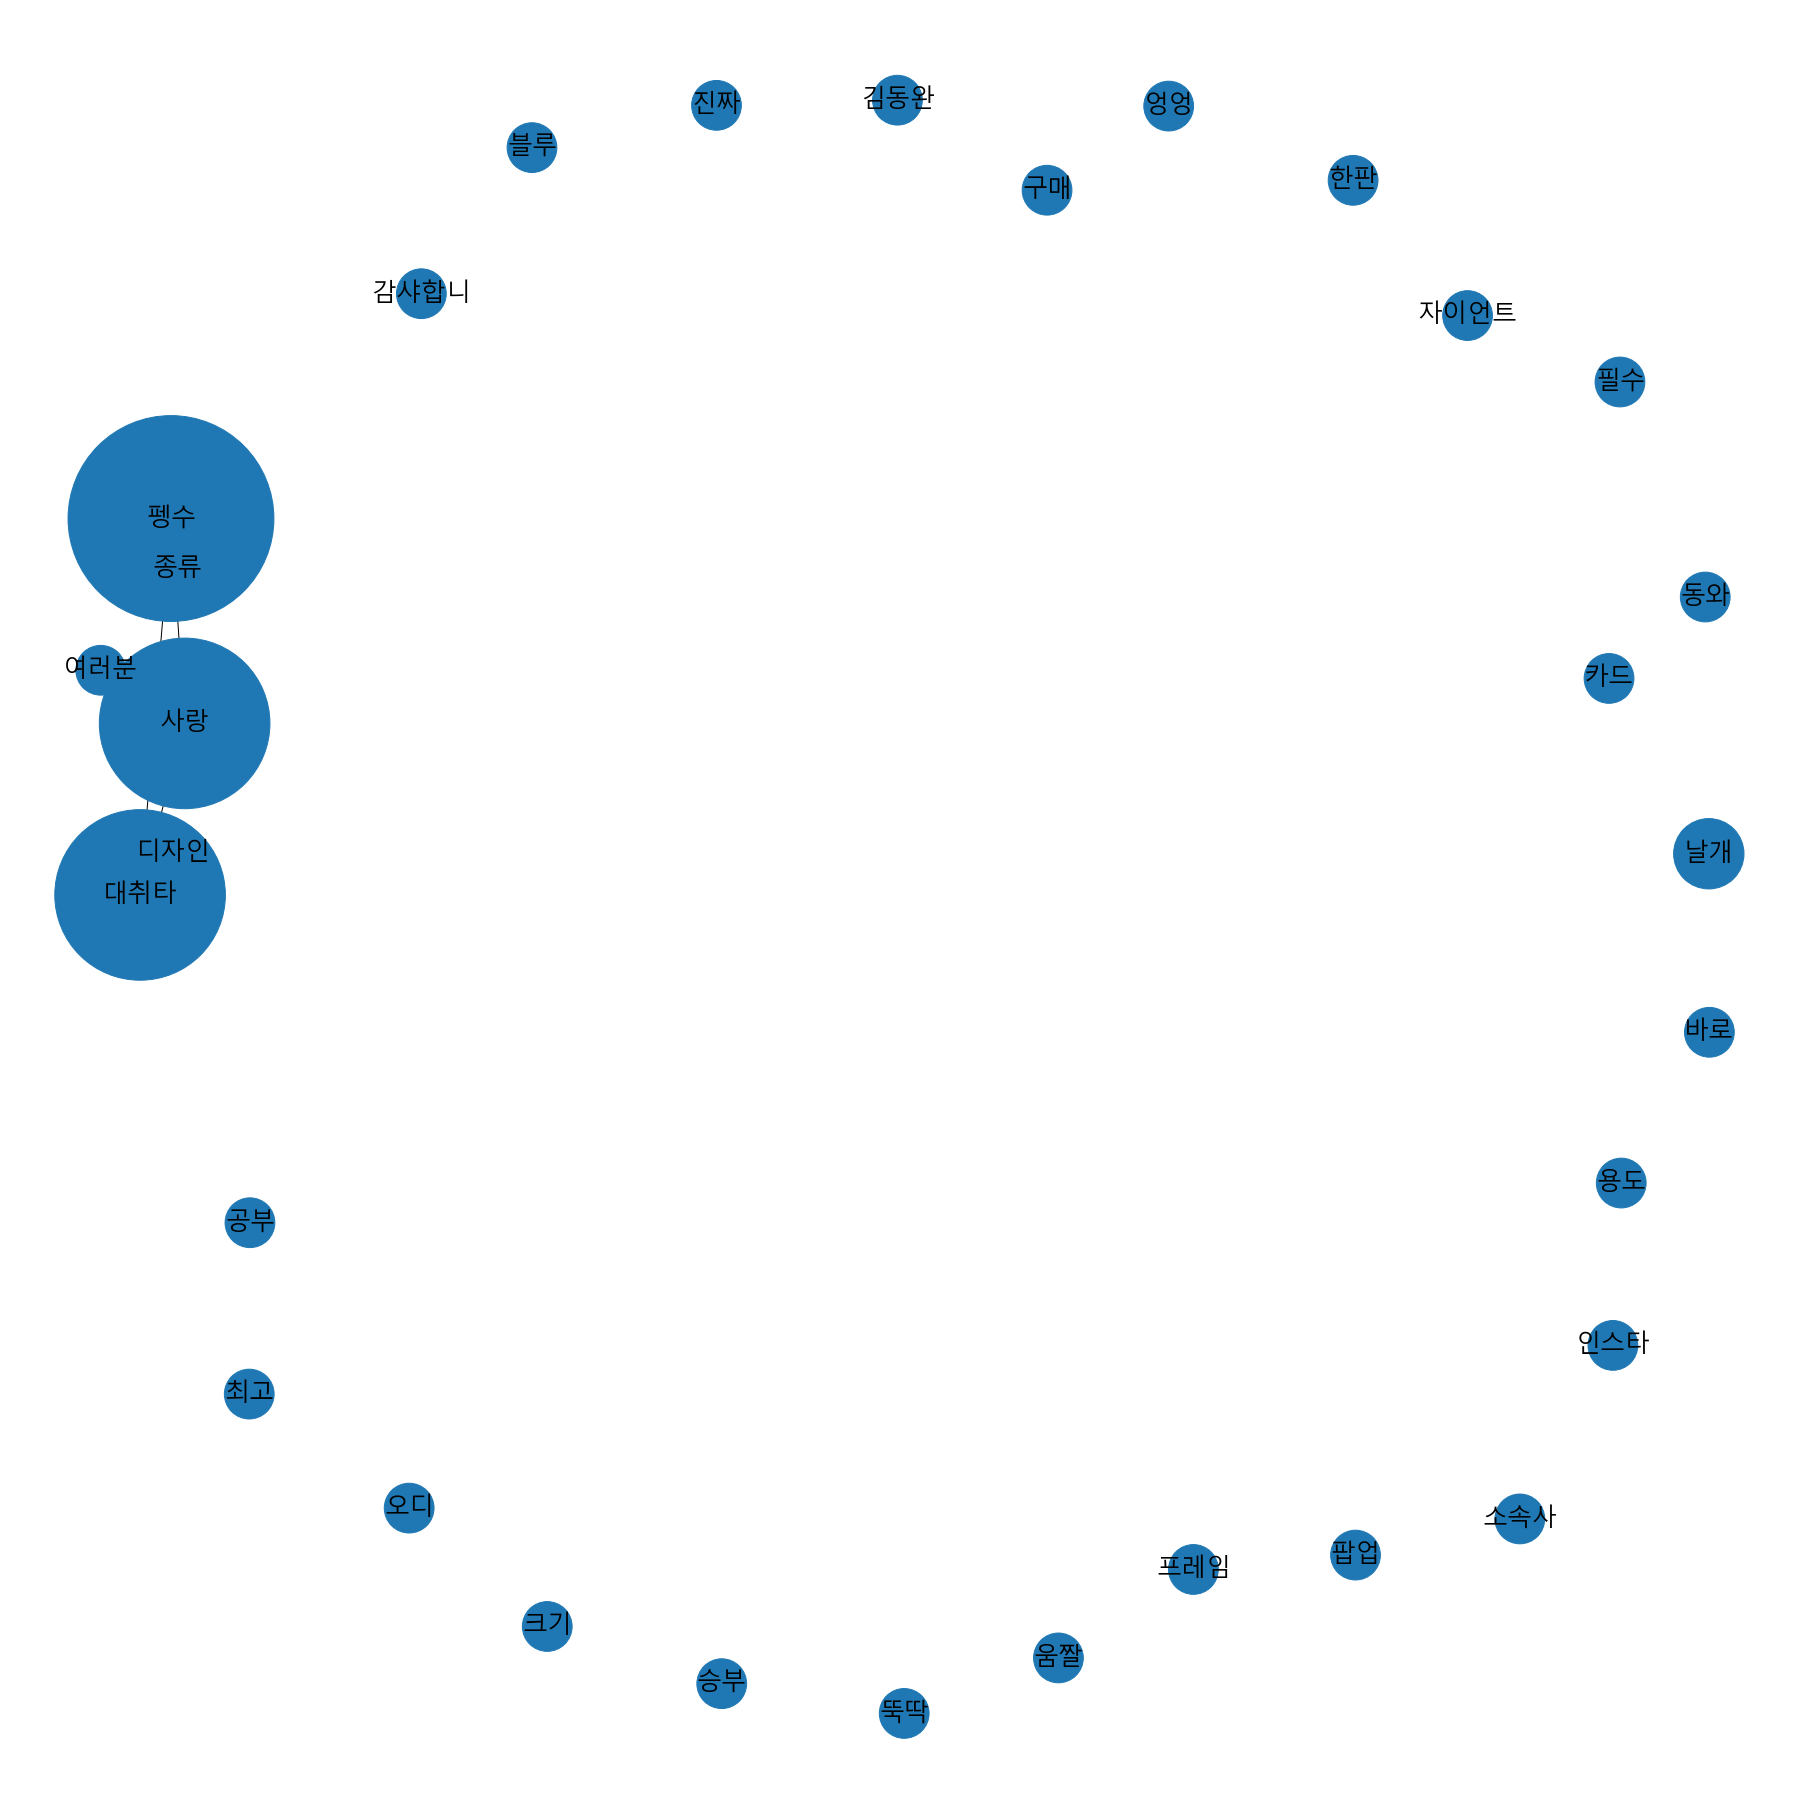

In [51]:
import networkx as nx
plt.figure(figsize=(25,25))

# networkx 그래프 객체를 생성합니다.
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성합니다.
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])
    
# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성합니다.
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])

# 그래프 디자인과 관련된 파라미터를 설정합니다.
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize']*25 for node in G]
nx.draw(G, pos=pos, node_size=sizes)

# Windows 사용자는 AppleGothic 대신,'Malgun Gothic'. 그 외 OS는 OS에서 한글을 지원하는 기본 폰트를 입력합니다.
nx.draw_networkx_labels(G, pos=pos, font_family='Malgun Gothic', font_size=25)

# 그래프를 출력합니다.
ax = plt.gca()
plt.show()